# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

        Lucas Eduardo De Mier

#### RA

11201723007

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

Iris

#### Características do Dataset

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### Fonte do Dataset

Artigo publicado em UCI Machine Learning Repository: Iris Data Set

### Objetivos

Clusterizar diferentes tipos de flores baseado em seus atributos

## Desenvolvimento

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn import metrics
from sklearn.decomposition import PCA, FastICA

data shape: (150, 4) target shape: (150,)


Text(0,0.5,'incercia')

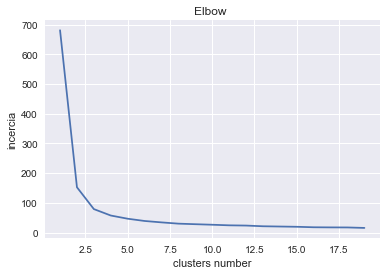

In [20]:
x=data.data
y=data.target
print("data shape:", x.shape, "target shape:", y.shape)

inc=[]
for i in range(1, 20):
    kmeans= KMeans(n_clusters=i).fit(x)
    inc.append(kmeans.inertia_)

plt.plot(range(1,20), inc)
plt.title("Elbow ")
plt.xlabel("clusters number")
plt.ylabel("incercia")

O joelho é observado quando o cluster number chega em 3, conforme o esperado do problema que carrega 3 tipos distintos de flores

Text(0.5,1,'Coeficiente de Silhueta em função do número de clusters')

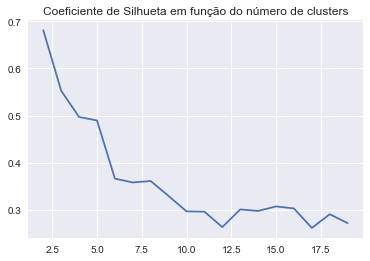

In [36]:
coef = []


for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    coefSilhueta = metrics.silhouette_score(x, kmeans.labels_, metric='euclidean')
    coef.append(coefSilhueta)

plt.plot(range(2,20), coef)
plt.title('Coeficiente de Silhueta em função do número de clusters')



O coef de silhueta corrobora o elbow quanto ao numero ótimo de clusters

C:\Users\l_mie\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Text(0.5,1,'ICA')

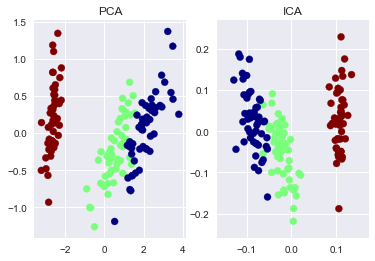

In [54]:
#Redução de dimensionadalide PCA e ICA
xPCA = PCA(n_components = 3).fit_transform(x)
xICA = FastICA(n_components=3).fit_transform(x)



f, arr = plt.subplots(1, 2)

arr[0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r')
arr[0].set_title('PCA')


arr[1].scatter(x=xICA[:, 0], y=xICA[:, 1], c=y, cmap='jet_r')
arr[ 1].set_title('ICA')


In [58]:
vetorInercias2 = []
vetorSilhuetas2 = []
vetorInercias3 = []
vetorSilhuetas3 = []
objLeaveOneOut = LeaveOneOut()
for trainIndex, testIndex in objLeaveOneOut.split(x):
    objKMeans2 = KMeans(n_clusters = 2)
    objKMeans3 = KMeans(n_clusters = 3)
    xTrain= x[trainIndex]
    yTrain = y[trainIndex]
    objKMeans2.fit(xTrain)
    objKMeans3.fit(xTrain)
    vetorInercias2.append(objKMeans2.inertia_)
    vetorSilhuetas2.append(metrics.silhouette_score(xTrain, objKMeans2.labels_, metric='euclidean'))
    vetorInercias3.append(objKMeans3.inertia_)
    vetorSilhuetas3.append(metrics.silhouette_score(xTrain, objKMeans3.labels_, metric='euclidean'))

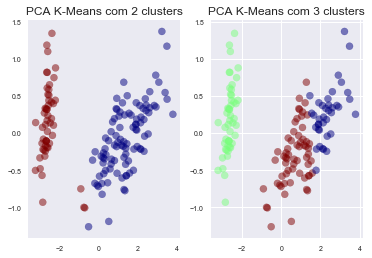

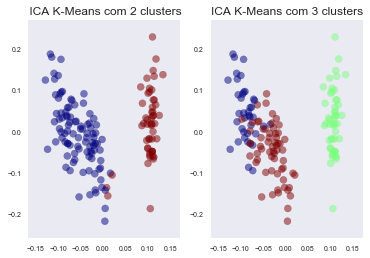

In [66]:

objKMeans2.fit(x)
objKMeans3.fit(x)


f, axarr = plt.subplots(1, 2)


axarr[0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans2.labels_, cmap='jet_r', s=50, alpha=0.5)

axarr[0].set_title('PCA K-Means com 2 clusters')
axarr[0].grid()

axarr[1].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans3.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[1].set_title('PCA K-Means com 3 clusters')




f, axarr = plt.subplots(1, 2)


axarr[0].scatter(x=xICA[:, 0], y=xICA[:, 1], c=objKMeans2.labels_, cmap='jet_r', s=50, alpha=0.5)

axarr[0].set_title(' ICA K-Means com 2 clusters')
axarr[0].grid()


axarr[1].scatter(x=xICA[:, 0], y=xICA[:, 1], c=objKMeans3.labels_, cmap='jet_r', s=50, alpha=0.5)

axarr[1].set_title('ICA K-Means com 3 clusters')



## Discussão sobre os resultados

Pode-se observar que por mais que a solução de fato do problema sejam 3 clusters, os dados obtidos por 2 clusters dão a impressão de serem mais bem definidos do que aqueles obtidos pela solução do problema. Entretanto isso se deve ao fato de dois dos clusters terem uma região de transição muito tênue e acabarem se "juntando" no plano bidimensional. Ainda sim seria possível obter a solução verdadeira apenas considerando as técnicas de elbow e silhueta que claramente apontam pra um numero de 3 clusters ideias. 